In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
#import is3_broker_rl
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

In [3]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = "/data/active/powertac/es22/is3-data"
COMMENTS = ""


In [4]:
print(COMMENTS)

In [5]:
#path = "../data/"
reward_prefix = "wholesale_reward.csv"

In [6]:
ANALYSIS_DIR = ANALYSIS_DIR_NAME

### Reward analysis

In [7]:
df_reward = pd.read_csv(os.path.join(ANALYSIS_DIR,reward_prefix))


In [8]:
# Fixes the issue that the experiment scheduler always assigns the same gameId
def write_unique_game_id(df):
    new_game_start_indices = df[df["timeslot"] < df["timeslot"].shift()].index
    if len(new_game_start_indices) > 0:
        df.loc[: new_game_start_indices[0], "gameId"] = f"game0"
        for i in range(len(new_game_start_indices) - 1):
            df.loc[new_game_start_indices[i] : new_game_start_indices[i + 1], "gameId"] = f"game{i + 1}"
        df.loc[new_game_start_indices[-1] :, "gameId"] = f"game{len(new_game_start_indices)}"

In [9]:
def min_max_scaler(series):
    return (series - series.min()) / (series.max() - series.min())

In [10]:

df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
df_reward2 = df_reward["observation"].apply(json.loads)
col_names = list(df_reward2.iloc[0].keys())
df_reward2 = df_reward2.apply(lambda x: list(x.values()))
temp_list = []
for row in df_reward2:

    temp_list.append(row)

temp_df = pd.DataFrame(temp_list, columns=col_names)

temp_merge_df = pd.DataFrame()
temp_name = []
for column in temp_df.columns:
    if type(temp_df[column].iloc[0]) == list:
        temp_df2 = temp_df[column].apply(pd.Series)
        i=0
        for column2 in temp_df2:
            temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
            i+=1
            
        
    else:
        temp_merge_df[column] = temp_df[column]
    
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")




/home/lkriehn/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/home/lkriehn/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [11]:
df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names
action_observation_reward_df = pd.concat([df_action,temp_merge_df, df_reward[["reward", "balancing_reward", "wholesale_reward","shaped_return","sum_mWh", "tariff_reward"]]],axis=1)
write_unique_game_id(action_observation_reward_df)
df = action_observation_reward_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24343 entries, 0 to 24342
Columns: 353 entries, energy_1 to tariff_reward
dtypes: float64(350), int64(2), object(1)
memory usage: 66.2+ MB


In [12]:
#df = df.iloc[2200:2500]

In [13]:
df[df["customer_count"].shift(1) -df["customer_count"] > 8000 | (df["customer_count"].shift(1) -df["customer_count"] < 8000)]["customer_count"]

5        7351
23       8291
59       9343
65       9266
77       9365
         ... 
24250    4077
24256    3719
24262    2613
24322    7092
24340    4683
Name: customer_count, Length: 2027, dtype: int64

In [14]:
df.iloc[5300:8000][["customer_count","reward","balancing_reward", "wholesale_reward","shaped_return","customer_count"]].tail(5)

,customer_count,reward,balancing_reward,wholesale_reward,shaped_return,customer_count
7995,5094,-129.138014,-0.129931,0.013143,-1.354747,5094
7996,5094,-120.905904,-0.149862,0.016212,-1.347104,5094
7997,5094,-181.351074,-0.312617,0.013161,-1.900692,5094
7998,5094,-181.255173,-0.308517,0.013164,-1.906179,5094
7999,5094,-182.344546,-0.341961,0.009945,-1.971834,5094


In [15]:
df

,energy_1,price_1,energy_2,price_2,energy_3,price_3,energy_4,price_4,energy_5,price_5,...,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,reward,balancing_reward,wholesale_reward,shaped_return,sum_mWh,tariff_reward
0,43.714702,-30.856383,-9.562671,29.440081,-3.256679,77.626455,25.836408,-2.756393,19.417739,-3.243303,...,0.0,0.0,0.0,0.0,-1.789018,-0.016593,0.000000,-0.226155,22.615485,0.028212
1,-30.179608,71.162558,-29.590166,51.409185,33.730328,-85.471225,-25.936103,78.422511,0.413215,-21.612608,...,0.0,0.0,0.0,0.0,-43.464877,-0.009787,0.000205,-0.308732,12.841533,0.015582
2,49.764800,-0.775039,47.578835,-80.166304,18.773544,-46.234632,30.363488,-31.813276,-8.681214,84.270477,...,0.0,0.0,0.0,0.0,-0.539079,-0.016477,-0.006217,-0.122748,12.274791,0.016502
3,6.783223,-75.006855,-20.567286,16.659772,-45.558012,46.697354,-17.196643,83.536732,-15.307105,11.524880,...,0.0,0.0,0.0,0.0,-1.126568,-0.015970,-0.001780,-0.120851,12.085066,0.017406
4,-31.089783,61.692882,23.071229,-77.219558,39.744627,-9.364879,-18.610609,90.617275,-18.550551,58.877552,...,0.0,0.0,0.0,0.0,-86.939405,-0.050858,-0.016682,-0.836589,4.433529,0.013717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24338,-49.999952,100.000000,-49.999696,99.999064,-49.999917,0.000000,-49.999210,100.000000,50.000000,-0.000045,...,0.0,0.0,0.0,0.0,-163.757623,-0.608061,-0.026770,-1.425157,-10.539933,0.003256
24339,-50.000000,100.000000,-49.998948,99.999321,-49.999753,0.000000,-49.999034,100.000000,50.000000,-0.000000,...,0.0,0.0,0.0,0.0,-46.682056,-0.037201,-0.023828,-0.162734,-17.670714,-0.003641
24340,-49.999872,99.999934,-49.999109,99.998921,-49.999779,0.000301,-49.999240,100.000000,50.000000,-0.000000,...,0.0,0.0,0.0,0.0,-78.183342,-0.112843,-0.025167,-0.633781,-2.506881,0.009914
24341,-50.000000,100.000000,-49.999267,99.998808,-49.999076,0.000405,-49.999046,100.000000,50.000000,-0.000000,...,0.0,0.0,0.0,0.0,-136.420175,-0.463391,-0.024060,-1.274277,3.713861,0.015460


In [16]:
df_reward_rolling = df["reward"].rolling(20).mean().dropna()
df_balancing_reward = df["balancing_reward"].rolling(1).mean().dropna()
df_wholesale_reward = df["wholesale_reward"].rolling(1).mean().dropna()
df_tariff_reward = df["tariff_reward"].rolling(1).mean().dropna()
#df_shaped = df_reward["shaped_return"].rolling(20).mean().dropna()

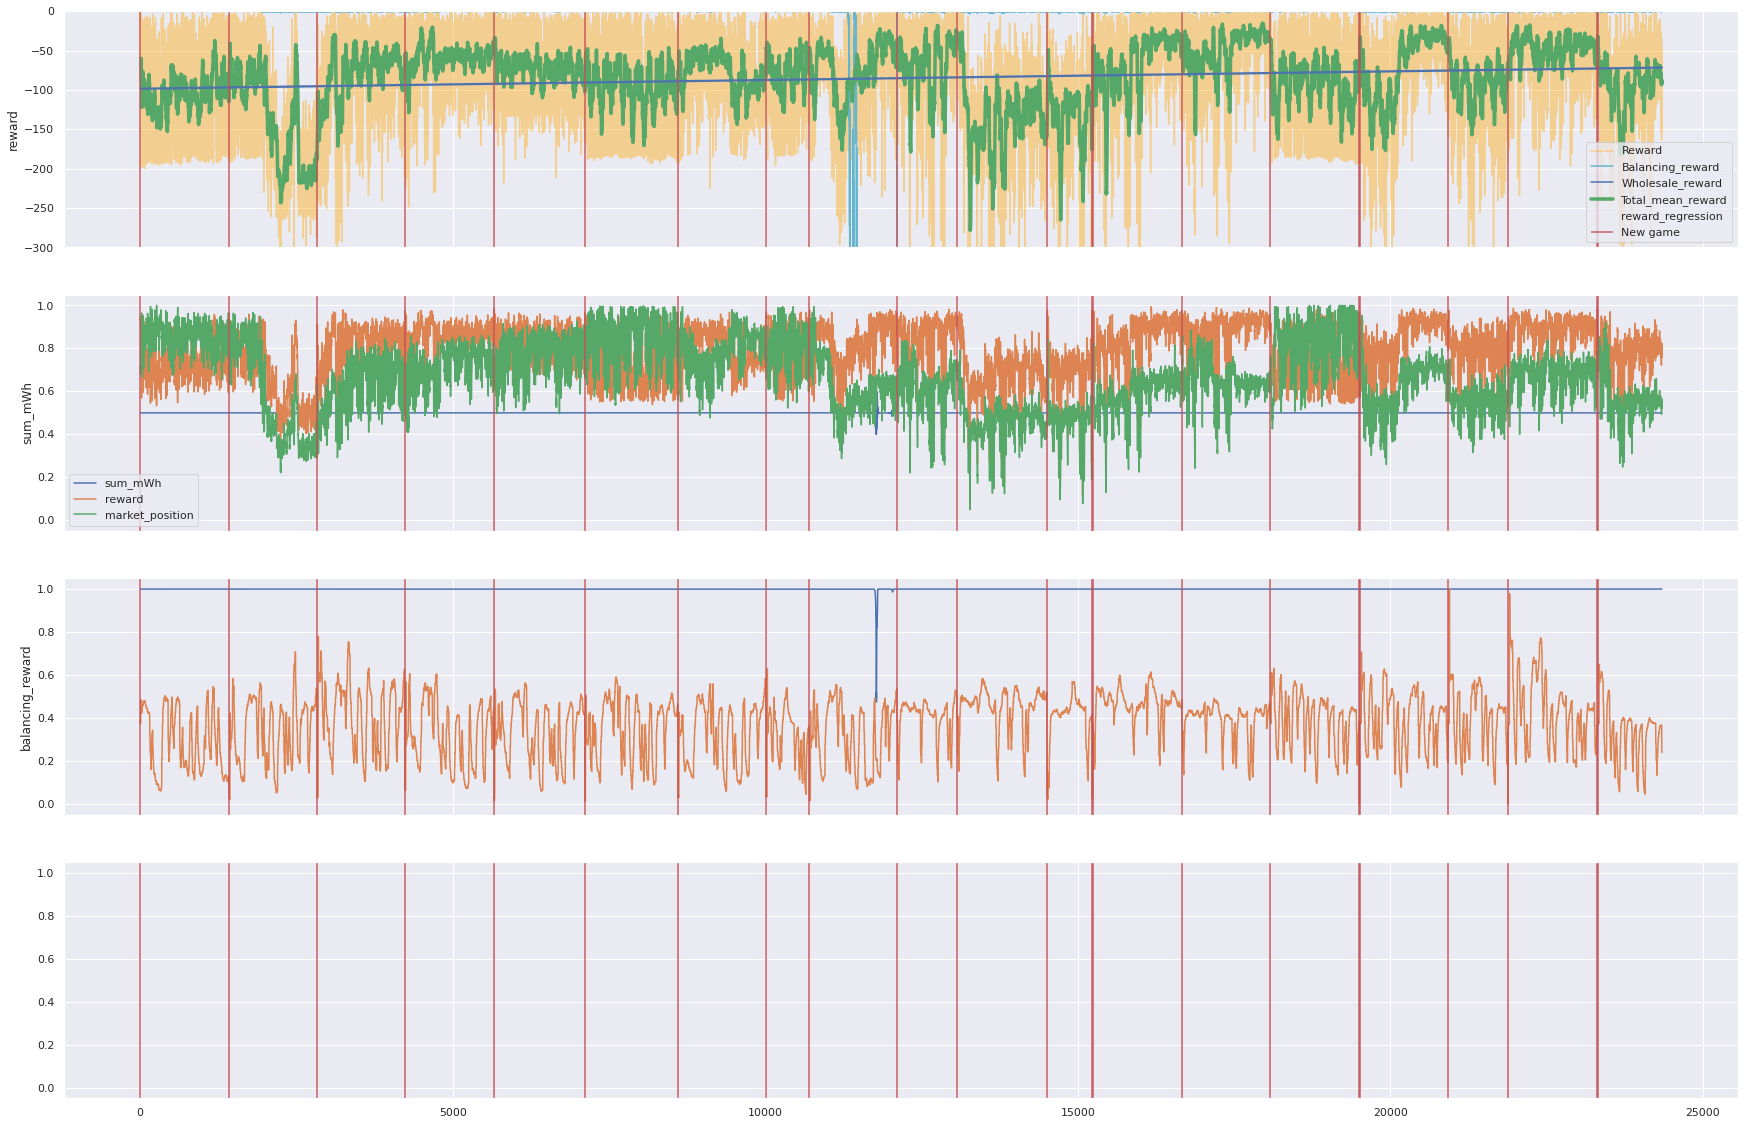

In [17]:

from cProfile import label


sns.set_theme()
sns.axes_style("darkgrid")
f, axs = plt.subplots(4, 1, sharex=True)



#graph5 = sns.lineplot(x=df_tariff_reward.index, y=df_tariff_reward, ax=axs, label="Tariff_reward")
#graph6 = sns.lineplot(x=df_shaped.index, y=df_shaped, ax=axs, label="Shaped_reward", color="green")

# plot 1: reward over time
graph7 = sns.lineplot(x=df.index, y=df["reward"], color="orange", ax=axs[0], alpha=0.4, label="Reward")

graph3 = sns.lineplot(x=df_balancing_reward.index, y=df_balancing_reward, ax=axs[0], label="Balancing_reward", color="c")
graph4 = sns.lineplot(x=df_wholesale_reward.index, y=df_wholesale_reward, ax=axs[0],label="Wholesale_reward", color="b")
graph2 = sns.lineplot(x=df_reward_rolling.index, y=df_reward_rolling, ax=axs[0], label="Total_mean_reward", linewidth= 3.5, color="g")
graph8 = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, marker="", label="reward_regression", ax=axs[0])
# plot 2: reward over time with prosumption
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["sum_mWh"]).rolling(5).mean(), data=df, ax=axs[1], label="sum_mWh")
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[1], label="reward")
sns.lineplot(x=df.index, y=min_max_scaler(df["market_position_0"]).rolling(5).mean(), data=df, ax=axs[1], label="market_position")
# plot 3: balancing reward with customer.
sns.lineplot(x=df.index, y=min_max_scaler(df["balancing_reward"]).rolling(5).mean(), data=df, ax=axs[2])
sns.lineplot(x=df.index, y=min_max_scaler(df["customer_count"]), data=df, ax=axs[2])


    

for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            0,
            1,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )
axs[0].legend()
axs[1].set_ylabel("sum_mWh")
axs[0].set_ybound(-300,0.05)
f.set_figwidth(30)
f.set_figheight(20)


<AxesSubplot:ylabel='reward'>

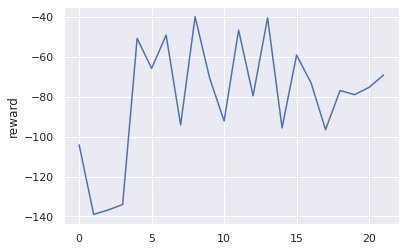

In [18]:
# mean reward per game:
df_game = df.groupby("gameId").mean()
sns.lineplot(x=range(len(df_game)), y= df_game["reward"])

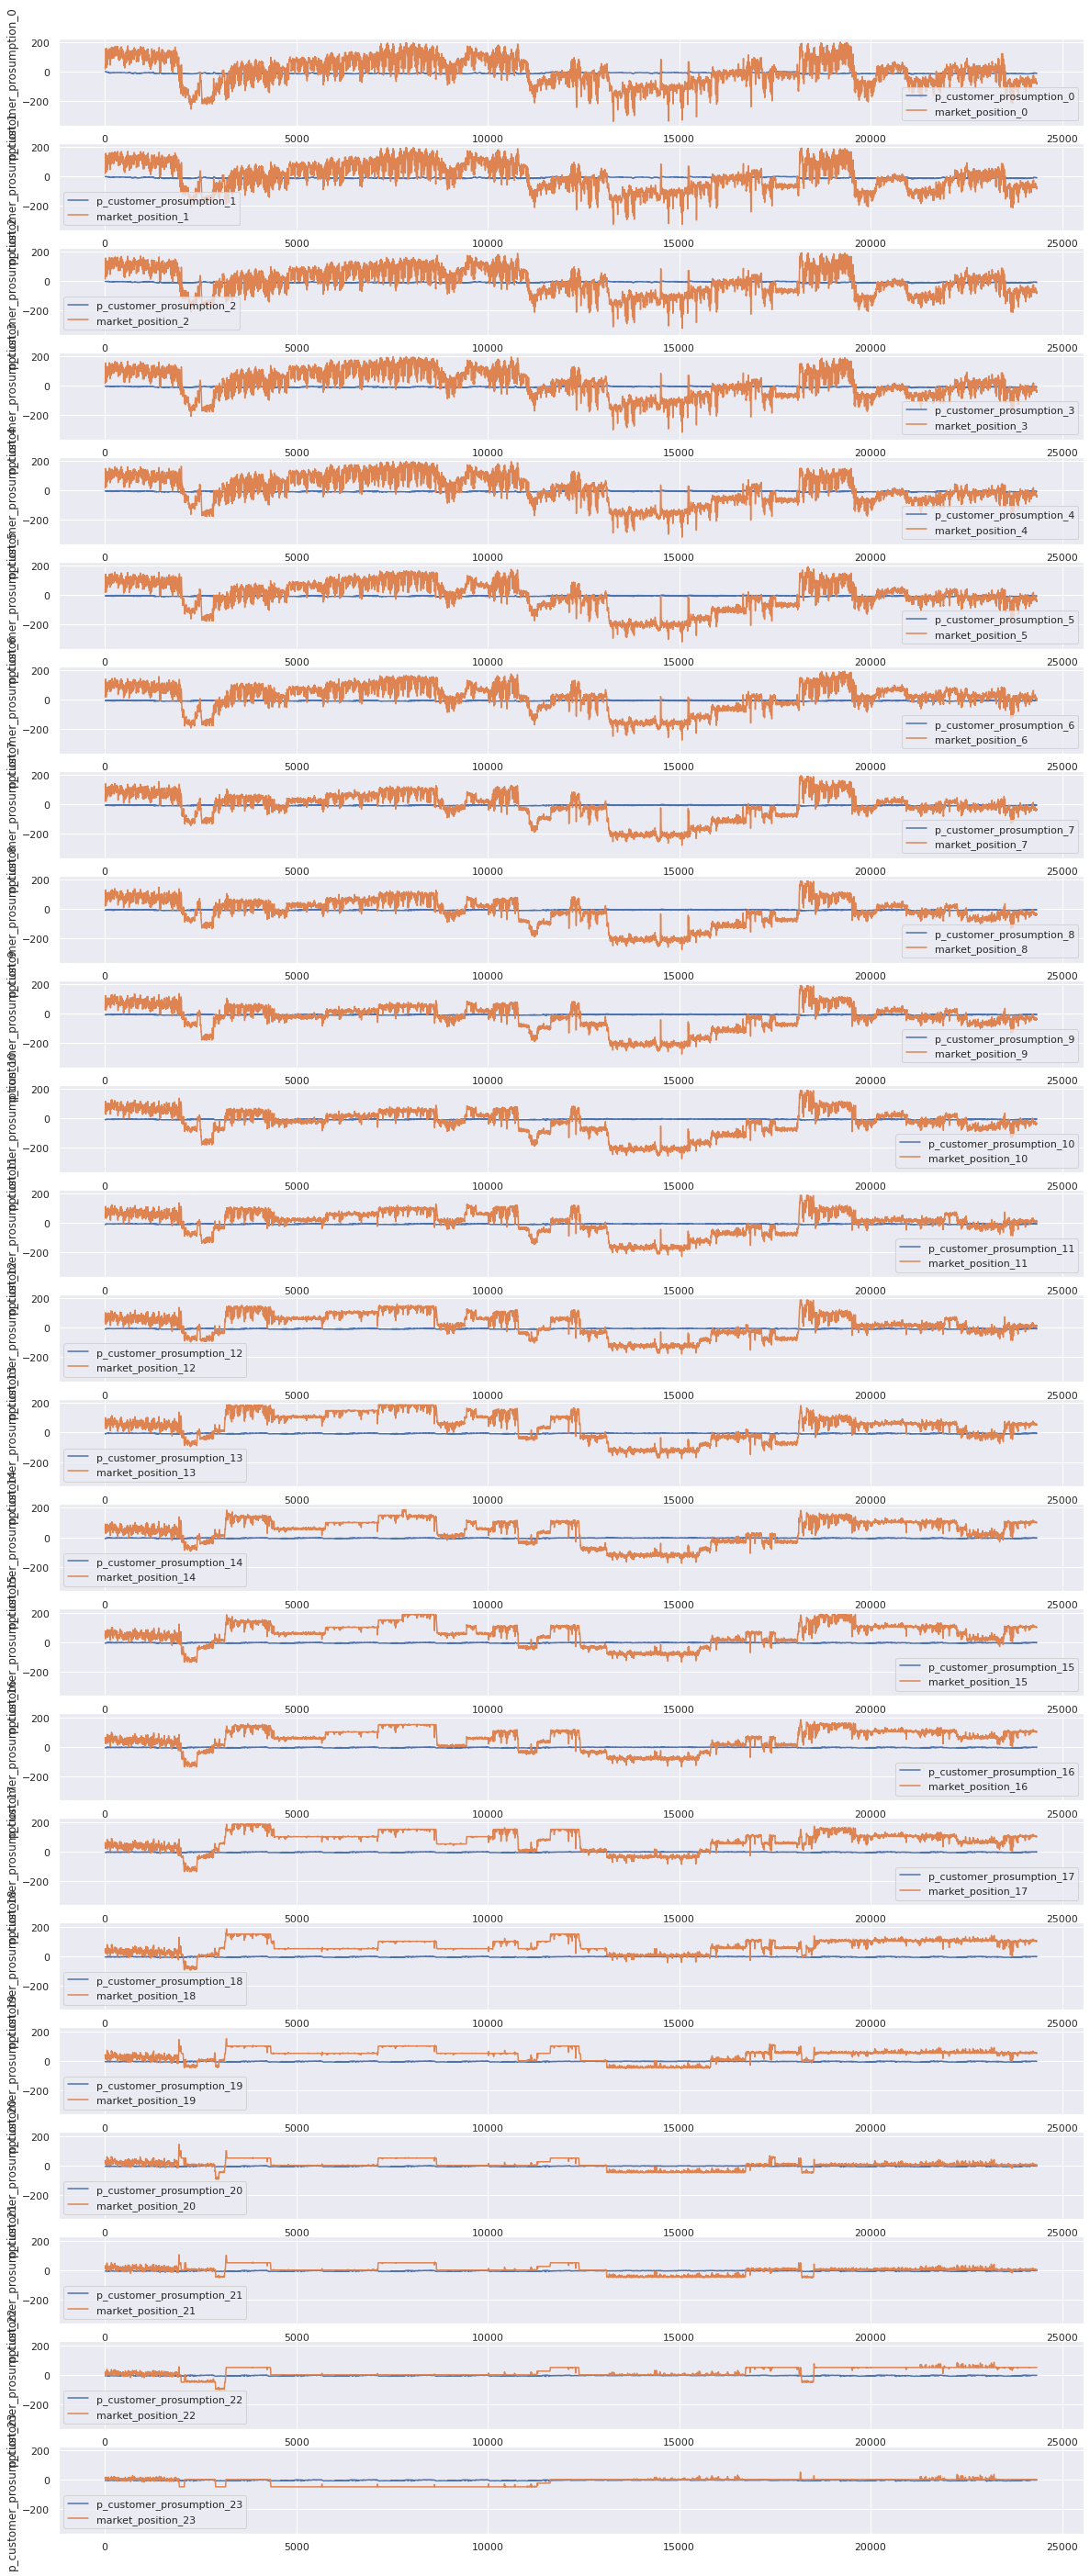

In [19]:
fig, axs = plt.subplots(24,1, sharey=True)
i=0
j=0
for col in df.columns:
    if "market" in col:
        sns.lineplot(x=df[col].index ,y=(df[col].rolling(10).mean()), data=df[col] , ax=axs[i], label=col)
        #sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[i], label="reward")
        i+=1
        
       
        #axs[i].legend()
    if "p_cus" in col:
        sns.lineplot(x=df[col].index ,y=(df[col].rolling(10).mean()/1000), data=df[col] , ax=axs[j], label=col)
        j+=1
        

fig.set_figwidth(20)
fig.set_figheight(50)



<AxesSubplot:ylabel='reward'>

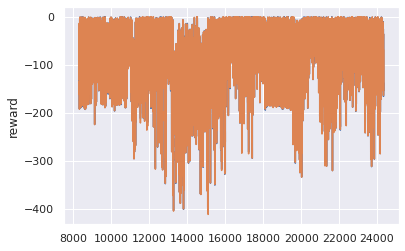

In [20]:
temp_df3 = abs(((abs(df["p_customer_prosumption_0"]/1000)) - df["market_position_0"])) * -1

temp_df3 =temp_df3.iloc[8300:]
sns.lineplot(x=temp_df3.index, y=temp_df3)
sns.lineplot(x=temp_df3.index, y= df["reward"].iloc[8300:])

In [21]:
abs((df["p_customer_prosumption_0"])).tail(50)

24293    10287.392578
24294    10715.216797
24295    11917.340820
24296    12111.742188
24297    12076.552734
24298    10932.974609
24299    10970.335938
24300    11865.225586
24301    12699.544922
24302    11587.921875
24303    10957.624023
24304    12294.003906
24305    11490.939453
24306     8654.689453
24307     8401.791016
24308     8498.641602
24309     9073.518555
24310     9690.150391
24311    10334.922852
24312    10588.050781
24313    10710.951172
24314    10727.241211
24315    11608.451172
24316    11238.916016
24317    11255.164062
24318    12728.098633
24319    13492.561523
24320    13493.144531
24321    12770.087891
24322    12795.343750
24323    12813.015625
24324    12749.437500
24325    13560.183594
24326    13185.162109
24327    12510.234375
24328    12110.828125
24329    12320.266602
24330    11542.768555
24331    10178.664062
24332     9920.824219
24333    10270.512695
24334    10225.614258
24335    10333.500000
24336    10718.261719
24337    10680.208984
24338    1

In [22]:
min_max_scaler(df["reward"])

0        0.995668
1        0.894431
2        0.998705
3        0.997277
4        0.788825
           ...   
24338    0.602222
24339    0.886616
24340    0.810095
24341    0.668629
24342    0.833234
Name: reward, Length: 24343, dtype: float64

In [23]:
for index, name in df[df["reward"] < 0.1].corr()["reward"].sort_values().iteritems():
    print(f"{index}, {name}")

price_20, -0.2931420178668741
price_23, -0.23524002124933652
energy_10, -0.23091305657871622
cleared_orders_price_19, -0.22277895494094452
energy_2, -0.20982774576611674
price_14, -0.18450782275981134
cleared_orders_price_22, -0.18433543051087922
price_7, -0.18197501810074213
price_17, -0.17787102794007448
cleared_trade_energy_1, -0.1775774319593148
price_24, -0.1761475970048913
cleared_trade_price_23, -0.15890162197508378
cleared_orders_energy_21, -0.15620076659706136
cleared_orders_price_6, -0.15390690972120113
energy_6, -0.1487466576641414
energy_15, -0.14520929019632614
cleared_trade_energy_21, -0.13871589020430014
cleared_trade_energy_17, -0.1311647274855818
energy_3, -0.12797636059700732
p_temperature_21, -0.11767660931459423
energy_13, -0.1170521350269864
cleared_orders_energy_5, -0.10907147628108836
p_temperature_20, -0.10896369677157501
cleared_trade_energy_14, -0.10421895712007337
price_16, -0.10247132087018318
price_21, -0.09945661392045345
p_temperature_19, -0.0974411169374

In [24]:
df["gameId"]

0         game0
1         game0
2         game0
3         game0
4         game0
          ...  
24338    game21
24339    game21
24340    game21
24341    game21
24342    game21
Name: gameId, Length: 24343, dtype: object

In [25]:
# Or just use shift?
index_slot = 201
col_names_temp = ["reward", "customer_count"]
templist = []
for i in range(24):
    energy_price_bid = df.iloc[(index_slot - i)][[f"energy_{i+1}",f"price_{i+1}"]].values
    trade_result = df.iloc[index_slot - i-1][[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"]].values
    market_position = df.iloc[index_slot -i][f"market_position_{i}"]
    sum_mwh = df.iloc[index_slot]["sum_mWh"]
    index_slot_list = df.iloc[index_slot-i].name
    predicted_prosumption=df.iloc[index_slot-i][f"p_customer_prosumption_{i}"]/1000
    #if i = 0:
    #    trade_result[0] = df.iloc[timeslot]["final"]
    templist.append([*energy_price_bid, *trade_result, market_position, sum_mwh, index_slot_list, predicted_prosumption])

df_action_analysis = pd.DataFrame(templist, columns=["energy_action", "price_action", "energy_orders_energy", "price_orders_energy", "market_position", "sum_mWh", "index_slot", "predicted_prosumption"])
df_action_analysis

,energy_action,price_action,energy_orders_energy,price_orders_energy,market_position,sum_mWh,index_slot,predicted_prosumption
0,20.948875,-55.200100,1.380897,-83.198431,122.858277,-15.462949,201,-8.075446
1,-34.203100,94.514418,0.045301,-61.918100,122.858277,-15.462949,200,-8.891500
2,39.426744,-64.900398,0.000000,0.000000,122.858277,-15.462949,199,-7.424801
3,-20.249772,87.139094,1.174797,-60.661208,122.858277,-15.462949,198,-7.520061
4,-17.130721,78.674626,1.155937,-11.964592,122.858277,-15.462949,197,-8.619257
5,19.383073,-35.302615,1.030622,-61.665344,122.858277,-15.462949,196,-11.012875
6,8.628356,-44.140124,1.710307,-48.188171,122.858277,-15.462949,195,-10.766790
7,-31.316829,74.266660,0.000000,0.000000,120.936198,-15.462949,194,-5.237130
8,17.067373,-76.622438,0.000000,0.000000,120.050398,-15.462949,193,-6.688187
9,34.325123,-58.708262,8.208845,-79.554722,120.050398,-15.462949,192,-3.619182


In [26]:
df_action_analysis.style.background_gradient(cmap="bwr")

,energy_action,price_action,energy_orders_energy,price_orders_energy,market_position,sum_mWh,index_slot,predicted_prosumption
0,20.948875,-55.200100,1.380897,-83.198431,122.858277,-15.462949,201,-8.075446
1,-34.203100,94.514418,0.045301,-61.918100,122.858277,-15.462949,200,-8.891500
2,39.426744,-64.900398,0.000000,0.000000,122.858277,-15.462949,199,-7.424801
3,-20.249772,87.139094,1.174797,-60.661208,122.858277,-15.462949,198,-7.520061
4,-17.130721,78.674626,1.155937,-11.964592,122.858277,-15.462949,197,-8.619257
5,19.383073,-35.302615,1.030622,-61.665344,122.858277,-15.462949,196,-11.012875
6,8.628356,-44.140124,1.710307,-48.188171,122.858277,-15.462949,195,-10.766790
7,-31.316829,74.266660,0.000000,0.000000,120.936198,-15.462949,194,-5.237130
8,17.067373,-76.622438,0.000000,0.000000,120.050398,-15.462949,193,-6.688187
9,34.325123,-58.708262,8.208845,-79.554722,120.050398,-15.462949,192,-3.619182


In [27]:
i = 0
index_slot = 201
df.iloc[index_slot][[*[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"], f"market_position_{i}", "sum_mWh", f"p_customer_prosumption_{i}"]]
#[*[f"sum_mWh", "price_1"], *["price_2", "test3"]]
#[*["test", "test2"],*["test3", "test4"]]
df["cleared_orders_energy_4"]

0        0.000000
1        0.000000
2        0.000000
3        0.413215
4        0.000000
           ...   
24338    0.000000
24339    0.000000
24340    0.000000
24341    0.000000
24342    0.000000
Name: cleared_orders_energy_4, Length: 24343, dtype: float64

In [28]:
df[["price_24","energy_24"]].iloc[177]

price_24     7.917655
energy_24   -8.279681
Name: 177, dtype: float64

In [29]:
a = df.iloc[df.index <201][[x for x in df.columns if (x.startswith("energy_") | (x.startswith("price_")))]]
a.iloc[a.index > 170].T

,171,172,173,174,175,176,177,178,179,180,...,191,192,193,194,195,196,197,198,199,200
energy_1,-25.693536,28.846192,13.488114,-1.135921,26.192725,-23.137569,31.833100,-6.525028,-34.100425,-18.460941,...,-24.493957,-30.644941,29.238451,46.018791,-46.184611,-4.243326,-22.630584,1.380897,17.998755,17.376280
price_1,67.999744,-84.955013,-9.804320,87.689173,-17.149198,14.478719,-32.845545,51.456499,21.515596,52.166057,...,81.272590,7.285249,-73.262119,-13.083863,34.264004,24.055541,64.205420,-95.245755,-77.161729,-16.134441
energy_2,-21.044779,-46.332347,-0.215733,19.926047,22.140193,0.470388,-15.553474,42.414403,-33.861339,5.037284,...,43.803144,31.553793,-18.152976,-10.516346,46.000767,-30.529976,37.039948,-49.605167,30.044854,-34.203100
price_2,48.846936,12.067854,68.328929,-6.438363,-55.934274,-7.963920,16.196048,-85.615611,65.015101,-58.287537,...,-36.483169,-41.320622,57.640660,72.529948,-51.248479,74.390364,-74.301720,45.017552,-3.193367,94.514418
energy_3,1.414514,-22.061312,-11.755657,2.939832,-15.821052,-24.136817,-41.652918,1.826596,20.201492,-41.459632,...,30.001485,45.380259,-17.307949,6.285834,12.290490,45.723724,-19.460881,10.237050,39.426744,36.970925
price_3,-69.185340,79.014897,17.112982,-33.469594,82.989919,50.858712,76.547647,-46.929622,-94.051898,66.605914,...,-85.719132,-21.705925,54.426515,-98.366427,-15.475214,-28.549743,44.295382,-80.844772,-64.900398,-76.221693
energy_4,46.202207,14.685571,17.902446,-28.894794,-22.368109,36.021280,14.755785,31.544876,44.273484,48.620439,...,-14.561689,35.317063,-35.585380,-3.569520,10.365844,-15.278351,43.717420,-20.249772,-35.837400,12.491274
price_4,-76.400232,-50.279081,-83.085203,0.338542,37.610531,-83.310318,-8.791029,-67.087817,-78.487587,-95.005357,...,41.337967,-2.392542,89.484155,4.213810,-72.793448,60.740352,-49.177551,87.139094,62.545037,-77.026618
energy_5,20.877635,34.990633,-32.962358,-9.697998,38.994789,22.936928,-22.252345,-26.790261,-46.757770,-35.712290,...,-26.344335,31.121063,37.790477,1.155937,-0.986922,-30.846870,-17.130721,-46.702397,1.424074,1.258481
price_5,-35.115719,-51.194751,13.649940,78.353238,-87.761080,-42.074323,85.117900,19.775021,64.080846,21.196759,...,52.912223,-86.541939,-43.513656,-72.134948,38.713038,77.818024,78.674626,33.116114,-40.255046,-84.769404


In [30]:
energy_price_bid

array([38.495028018951416, -56.670594215393066], dtype=object)

In [31]:
for index, value in df[df.columns.difference(pd.Index(["gameId"]))].corr()["reward"].sort_values().iteritems():
    
    print(index, value)

price_20 -0.2931420178668741
price_23 -0.23524002124933652
energy_10 -0.23091305657871622
cleared_orders_price_19 -0.22277895494094452
energy_2 -0.20982774576611674
price_14 -0.18450782275981134
cleared_orders_price_22 -0.18433543051087922
price_7 -0.18197501810074213
price_17 -0.17787102794007448
cleared_trade_energy_1 -0.1775774319593148
price_24 -0.1761475970048913
cleared_trade_price_23 -0.15890162197508378
cleared_orders_energy_21 -0.15620076659706136
cleared_orders_price_6 -0.15390690972120113
energy_6 -0.1487466576641414
energy_15 -0.14520929019632614
cleared_trade_energy_21 -0.13871589020430014
cleared_trade_energy_17 -0.1311647274855818
energy_3 -0.12797636059700732
p_temperature_21 -0.11767660931459423
energy_13 -0.1170521350269864
cleared_orders_energy_5 -0.10907147628108836
p_temperature_20 -0.10896369677157501
cleared_trade_energy_14 -0.10421895712007337
price_16 -0.10247132087018318
price_21 -0.09945661392045345
p_temperature_19 -0.09744111693744559
p_temperature_0 -0.096

In [32]:
df2 = pd.DataFrame()
df2["predicted_consumption_mWh"] = df["p_customer_prosumption_0"] /-1000
df2["timeslot"] = df["timeslot"]
df2["market_position_0"] = df["market_position_0"]
df2["sum_mWh"] = df["sum_mWh"]
df2["error_prediction"] = abs(df2["sum_mWh"]) - df2["predicted_consumption_mWh"]
df2

,predicted_consumption_mWh,timeslot,market_position_0,sum_mWh,error_prediction
0,1.789018,360,0.000000,22.615485,20.826466
1,-0.249825,363,0.000000,12.841533,13.091359
2,0.539079,364,43.714703,12.274791,11.735712
3,1.126568,365,0.000000,12.085066,10.958498
4,1.152980,366,0.000000,4.433529,3.280549
...,...,...,...,...,...
24338,10.702003,1379,-25.026317,-10.539933,-0.162070
24339,12.737922,1380,-153.055620,-17.670714,4.932792
24340,12.298410,1381,-33.944134,-2.506881,-9.791530
24341,12.706352,1382,-65.884932,3.713861,-8.992491


### Action analysis

In [33]:
#f,axs = plt.subplots(1,1,figsize=(25,25))
#for i in range(1):
    #ax = sns.scatterplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
#    ax = sns.histplot(x=df[f"price_{i+1}"], y=df[f"energy_{i+1}"], data=df, hue="balancing_reward", ax=axs)
    

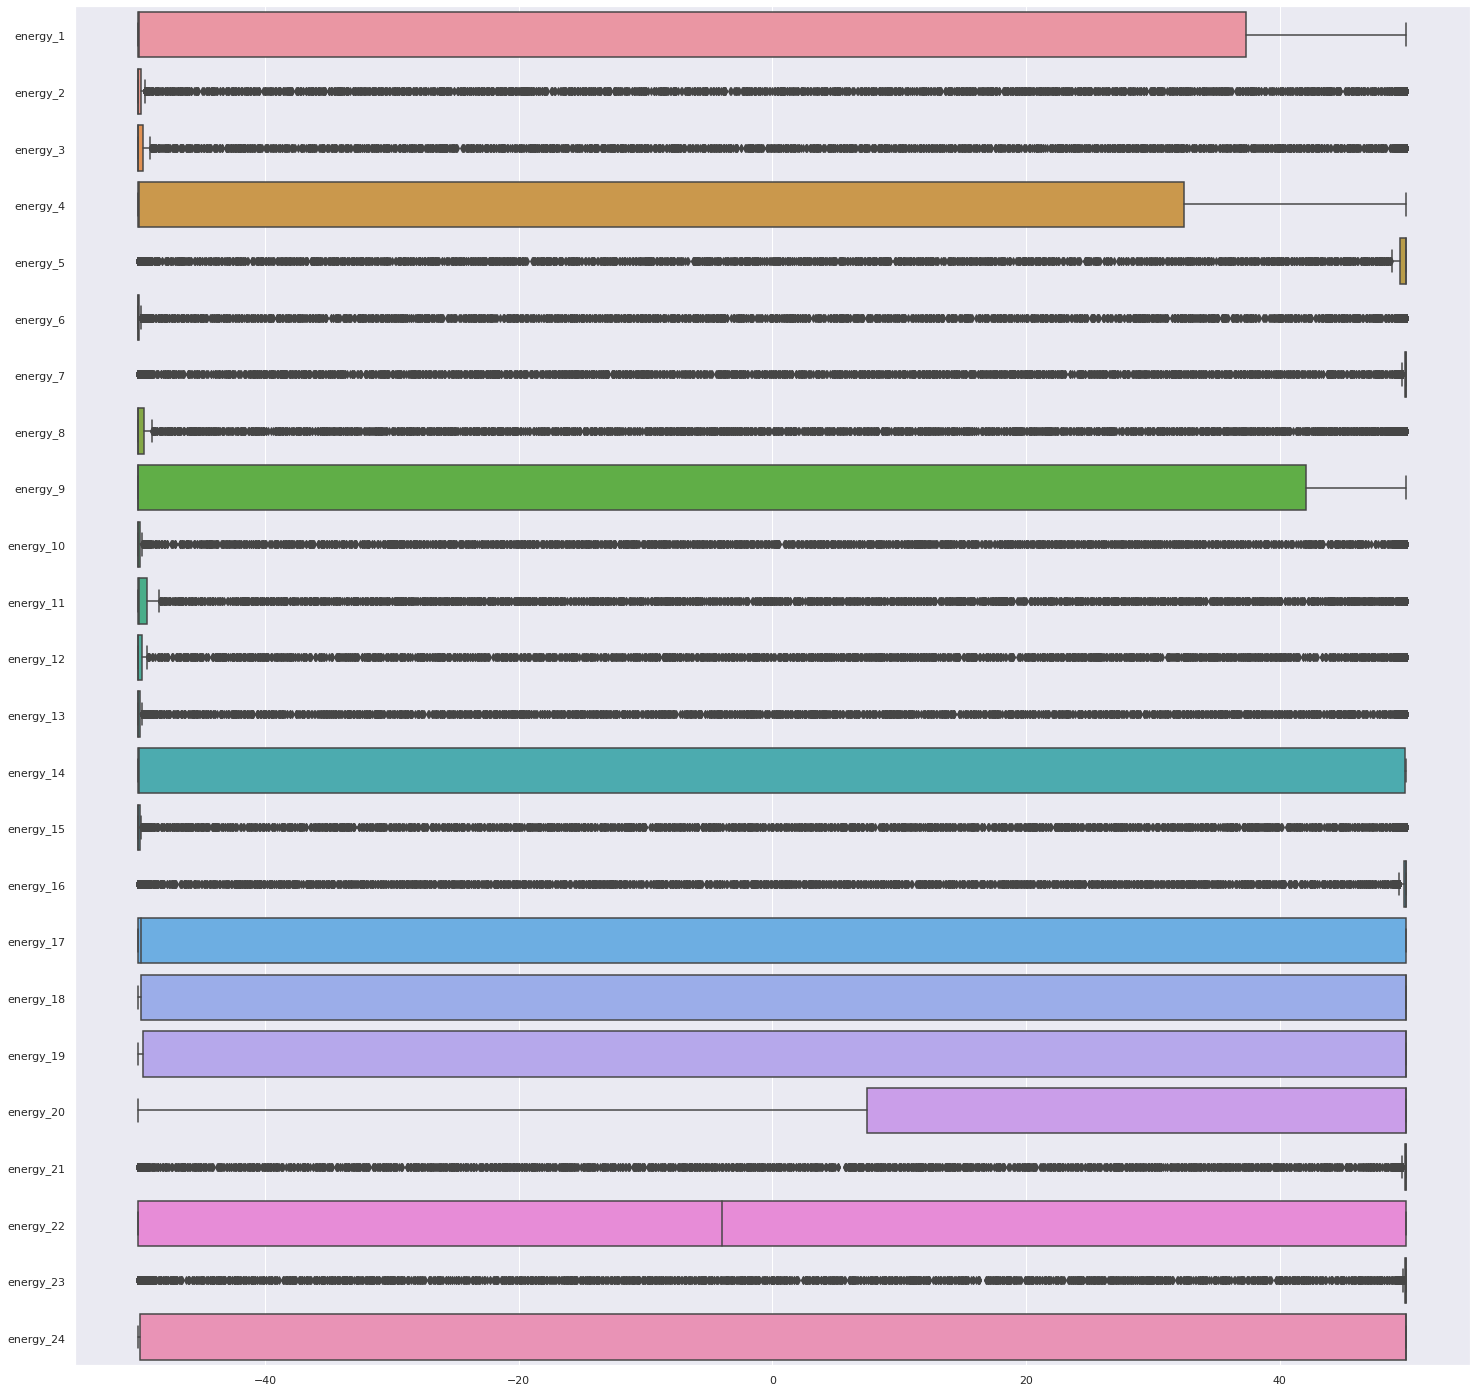

In [34]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[energy], orient="h")

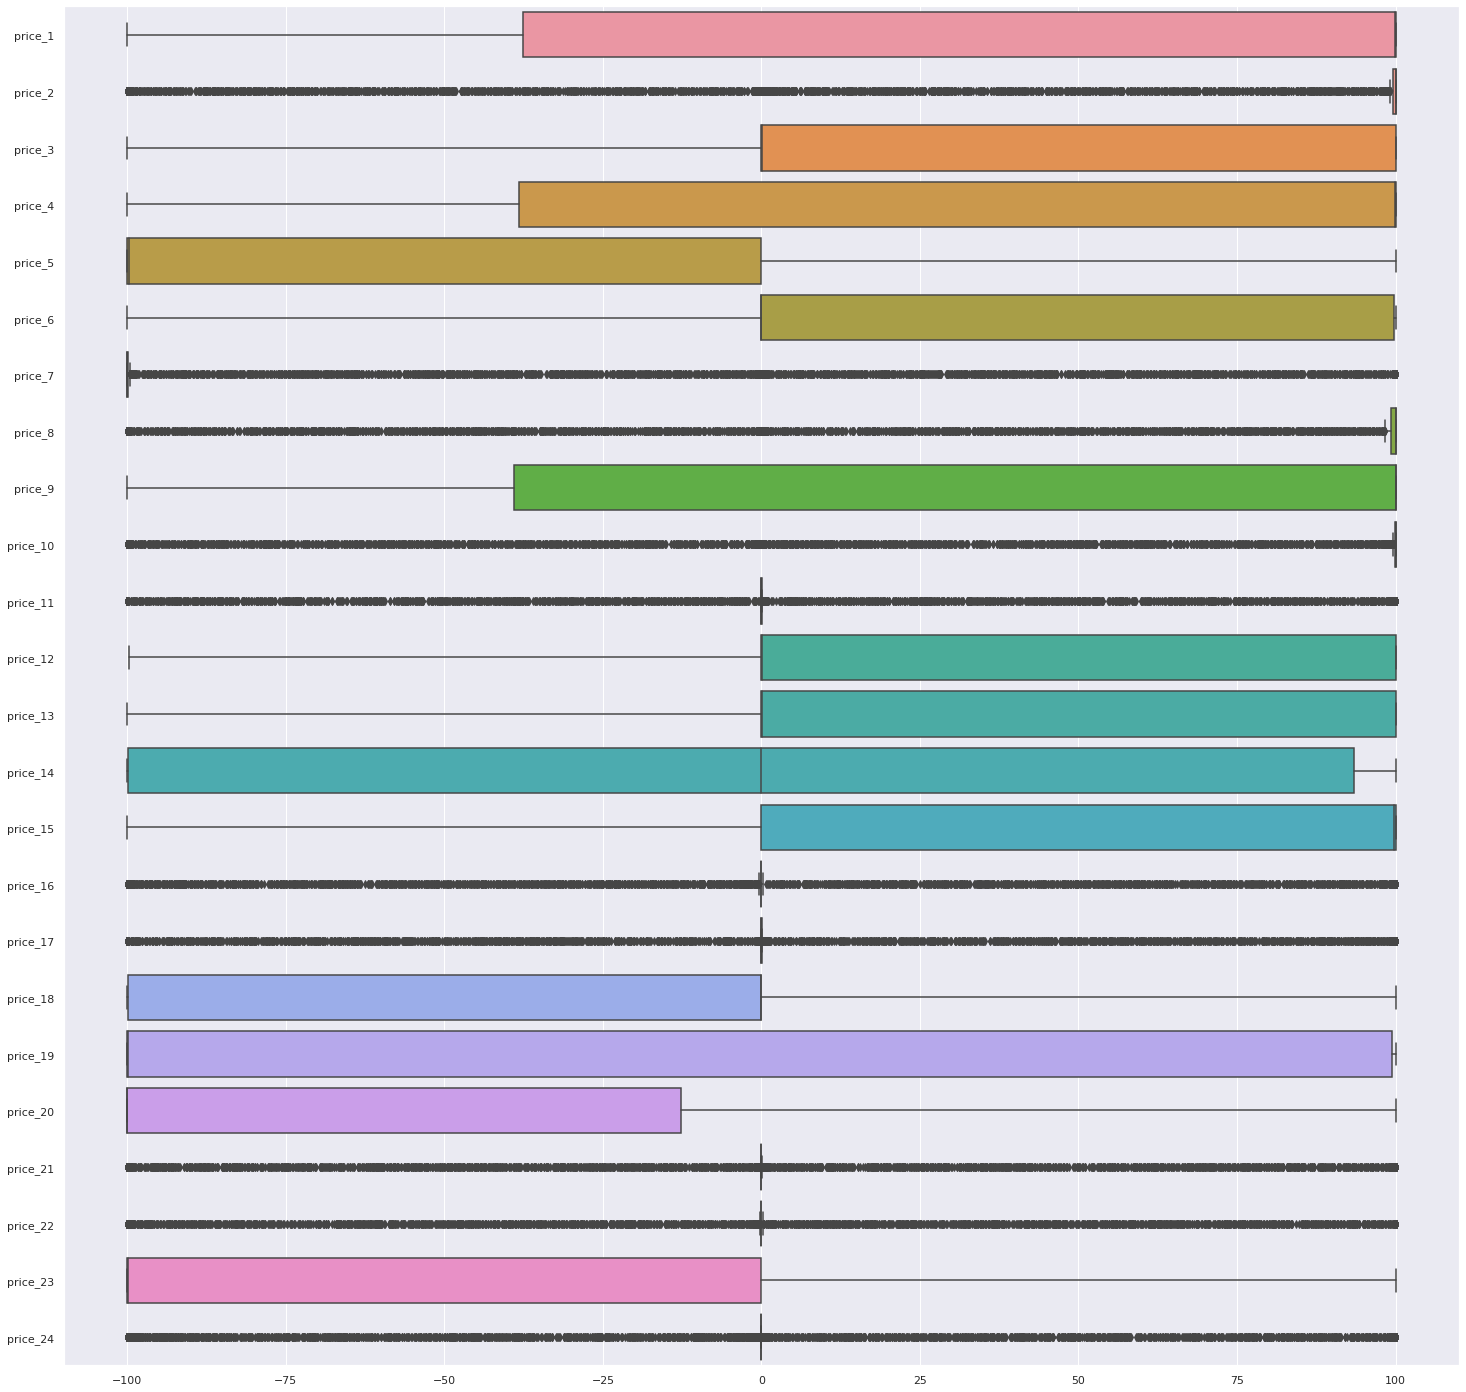

In [35]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[price],  orient="h")

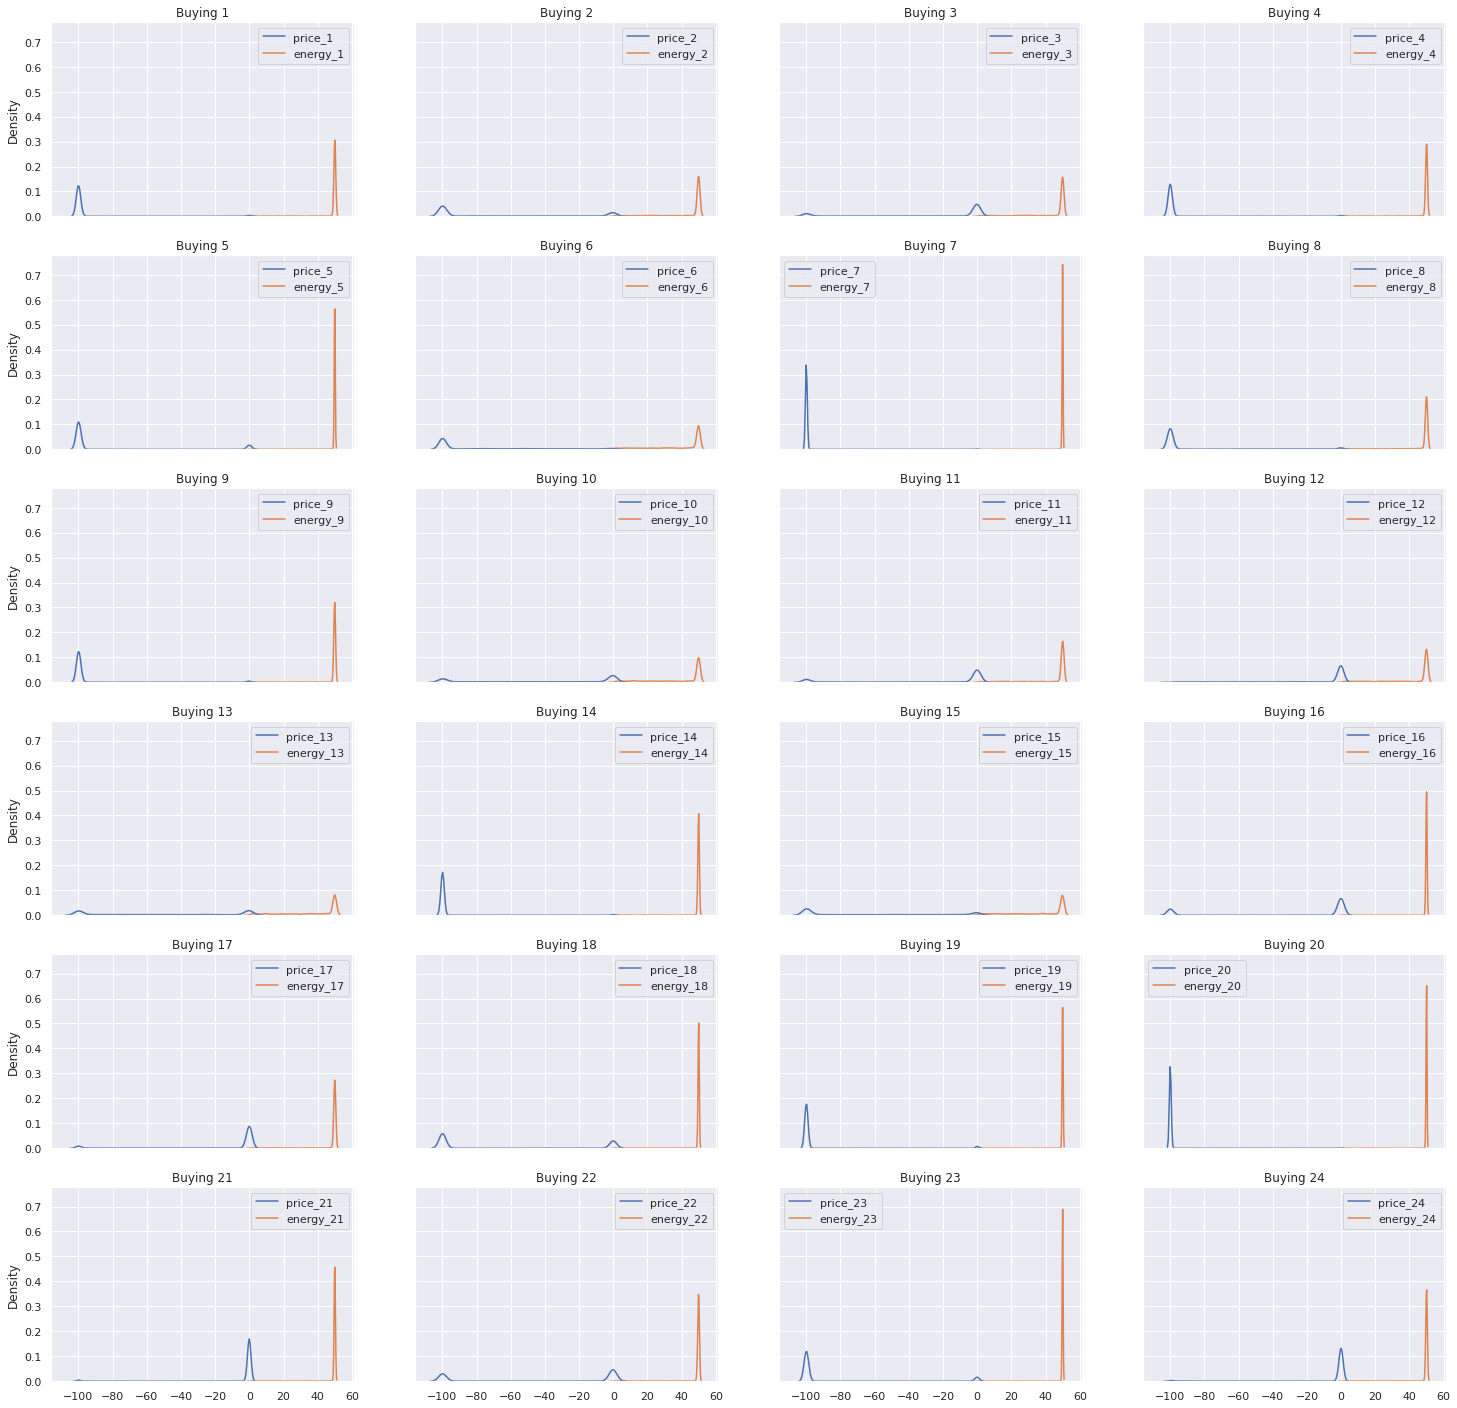

In [36]:
f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)

for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]<0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Buying {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)


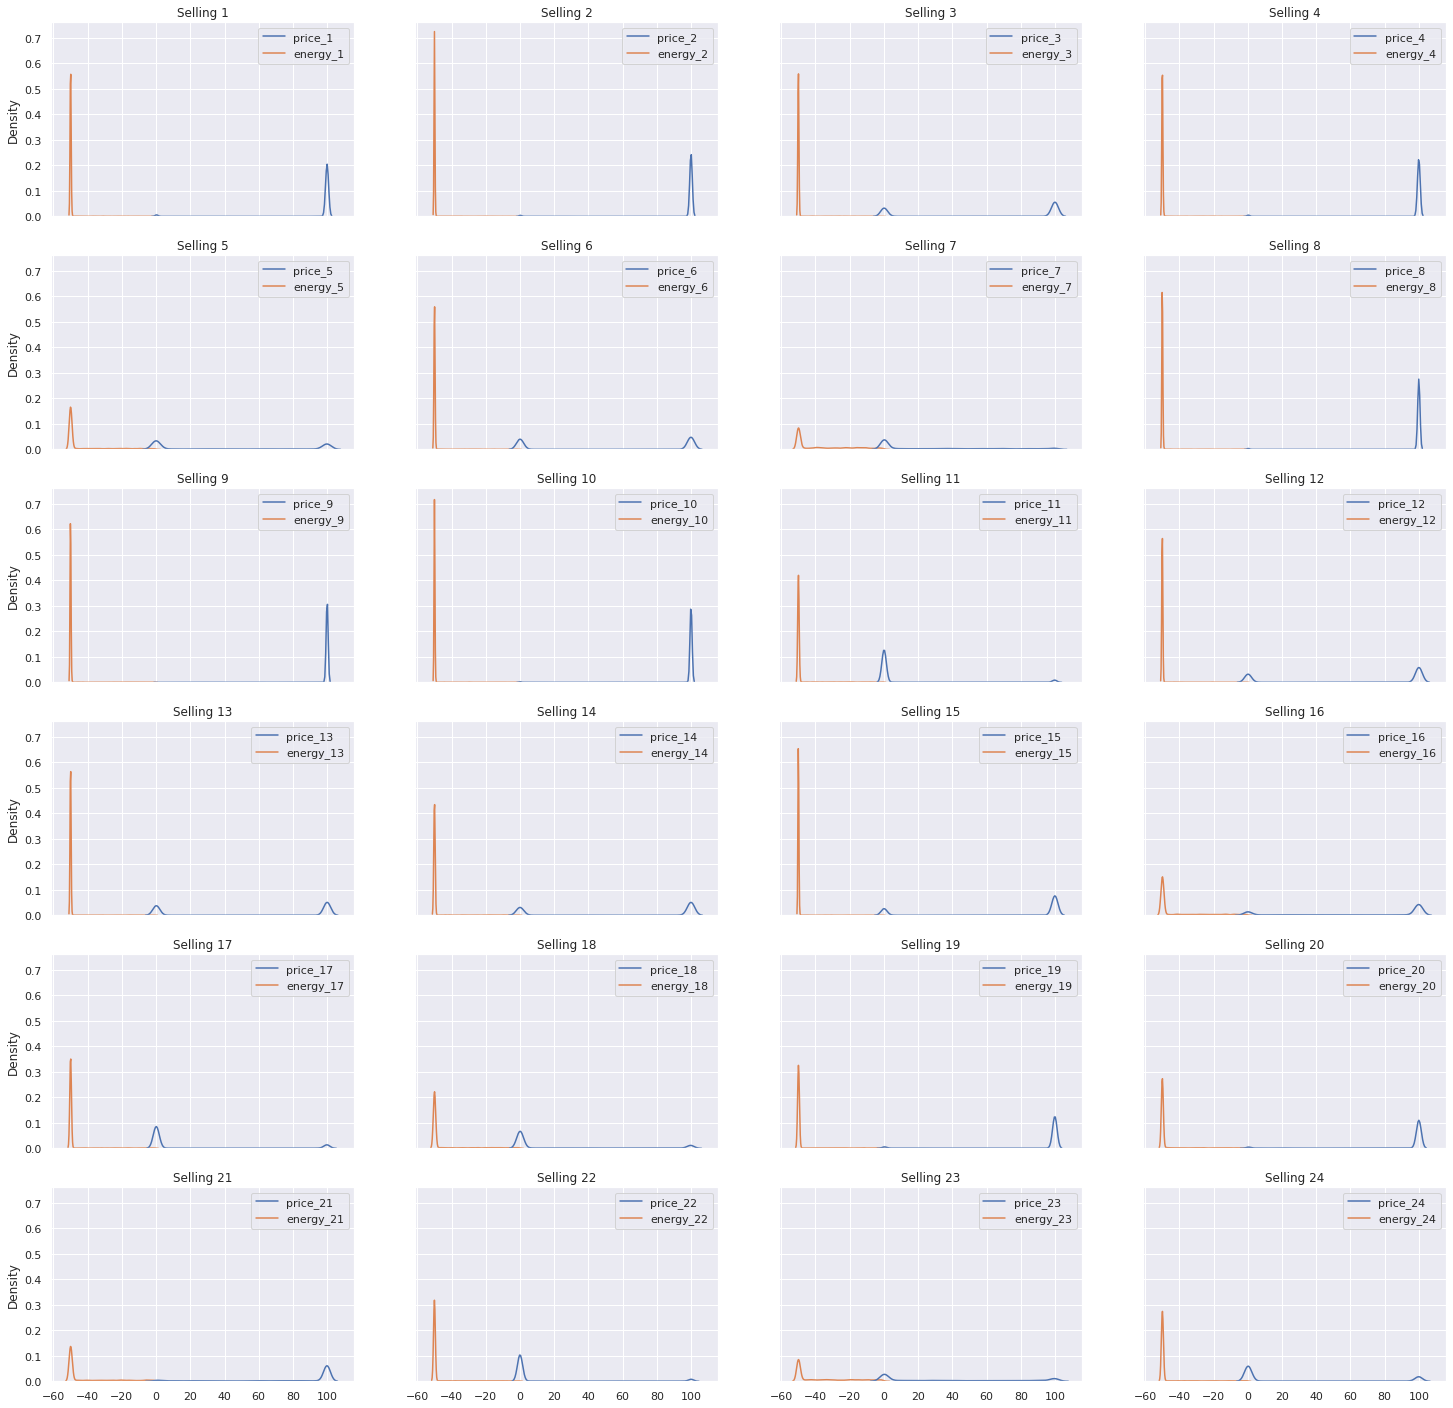

In [37]:
# Selling
from matplotlib.pyplot import title


f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)
for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]>0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Selling {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)